In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time 

In [20]:
def brightness(image):
    # Tăng độ sáng lên 30
    adjust_img = image + 30
    # Giới hạn giá trị của các phần tử từ 0 đến 255
    new_img_clip = np.clip(adjust_img, 0, 255)
    # Chuyển đổi mảng numpy thành ảnh PIL
    result = Image.fromarray(new_img_clip.astype(np.uint8))
    return result

In [21]:
def contrast(image):
    # Thay đổi độ tương phản bằng cách nhân giá trị contrast vào mỗi pixel
    adjust_img = image * 1.7
    # Giới hạn giá trị của các phần tử từ 0 đến 255
    new_img_clip = np.clip(adjust_img, 0, 255)
    # Chuyển đổi mảng numpy thành ảnh PIL
    result = Image.fromarray(new_img_clip.astype(np.uint8))
    return result

In [22]:
def flip_image(image, mode):
    # Lật ảnh theo mode
    if mode == "horizontal":
        result = image[::-1]
    elif mode == "vertical":
        result = image[:, ::-1]    
    else:
        result = image[::-1]
    result = Image.fromarray(result.astype(np.uint8))
    return result

In [23]:
def grayscale(image):
    # Chuyển đổi ảnh thành ảnh xám
    luminosity_constant = [0.3, 0.59, 0.11]
    grayscale_image = np.dot(image[..., :3], luminosity_constant).astype(np.uint8) 
    
    return Image.fromarray(grayscale_image)

In [24]:
def sepia(image):
    # Chuyển đổi ảnh thành ảnh sepia
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    sepia_image = np.dot(np.array(image), sepia_filter.T)
    sepia_image = np.clip(sepia_image, 0, 255)
    
    return Image.fromarray(sepia_image.astype(np.uint8))

In [25]:
def blur(image):
    # Gaussian_Blur_5 = np.array([[[1], [4], [6], [4], [1]], 
    #                             [[4], [16], [24], [16], [4]], 
    #                             [[6], [24], [36], [24], [6]], 
    #                             [[4], [16], [24], [16], [4]], 
    #                             [[1], [4], [6], [4], [1]]])
    # image_copy = np.copy(image)
    # image_padding = np.pad(image_copy, ((2, 2), (2, 2), (0, 0)))

    Gaussian_Blur_3 = np.array([[[1], [2], [1]],
                                [[2], [4], [2]],
                                [[1], [2], [1]]])

    # Sao chép ảnh để không ảnh hưởng đến ảnh gốc
    image_copy = np.copy(image)

    # Tính kích thước của ảnh
    height, width, _ = image_copy.shape

    # Tạo kernel Gaussian 3x3 (phần tử tổng của kernel = 16)
    kernel = Gaussian_Blur_3 / 16

    # Tạo ảnh mới để chứa kết quả sau khi blur
    blurred_image = np.zeros_like(image_copy)

    # Thực hiện phép tích chập giữa kernel và ảnh
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            blurred_image[i, j] = (image_copy[i - 1:i + 2, j - 1:j + 2] * kernel).sum(axis=(0, 1))

    result = Image.fromarray(blurred_image.astype(np.uint8))
    return result


In [26]:
def sharpen(image):
    Sharp = np.array([[[0], [-1], [0]],
                      [[-1], [5], [-1]],
                      [[0], [-1], [0]]])

    # Sao chép ảnh để không ảnh hưởng đến ảnh gốc
    image_copy = np.copy(image)

    # Tính kích thước của ảnh
    height, width, _ = image_copy.shape

    # Tạo kernel Gaussian 3x3 (phần tử tổng của kernel = 16)
    kernel = Sharp

    # Tạo ảnh mới để chứa kết quả sau khi blur
    blurred_image = np.zeros_like(image_copy)

    # Thực hiện phép tích chập giữa kernel và ảnh
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            blurred_image[i, j] = (image_copy[i - 1:i + 2, j - 1:j + 2] * kernel).sum(axis=(0, 1))

    result = Image.fromarray(blurred_image.astype(np.uint8))
    return result

In [27]:
def crop(image):
    # Chuyển ảnh sang mảng numpy
    img_array = np.array(image)
    size = 700

    # Lấy kích thước ảnh
    height, width, _ = img_array.shape

    # Tính toán tọa độ cắt
    left = (width - size) // 2
    top = (height - size) // 2
    right = left + size
    bottom = top + size

    # Cắt ảnh bằng NumPy slicing
    cropped_img_array = img_array[top:bottom, left:right, :]

    # Tạo ảnh mới từ mảng numpy đã cắt
    result = Image.fromarray(cropped_img_array)

    return result


In [28]:
def circle_crop(image):
    # Tạo mask tròn
    height, width, _ = image.shape
    x_center, y_center = width // 2, height // 2
    y, x = np.ogrid[:height, :width]
    mask = (x - x_center)**2 + (y - y_center)**2 <= (min(width, height) // 2)**2

    # Áp dụng mask lên ảnh
    masked_img_array = np.zeros_like(image)
    masked_img_array[mask] = image[mask]

    # Tạo ảnh mới từ mảng numpy đã mask
    masked_image = Image.fromarray(masked_img_array)

    return masked_image



In [29]:
def ellipse_crop(image):
    # # Tạo mask elip
    # mask = Image.new("L", image.size, 0)
    # draw = ImageDraw.Draw(mask)
    # width, height = image.size
    # draw.ellipse((0, 0, width, height), fill=255)
    # draw.ellipse((width // 4, height // 4, width * 3 // 4, height * 3 // 4), fill=0)
    
    # # Áp dụng mask lên ảnh
    # masked_image = Image.composite(image, Image.new("RGB", image.size), mask)
    
    # return masked_image
    # Tạo mask tròn
    height, width, _ = image.shape
    x_center, y_center = width // 2, height // 2
    y, x = np.ogrid[:height, :width]
    mask = (x - x_center)**2 + (y - y_center)**2 <= (min(width, height) // 2)**2

    # Áp dụng mask lên ảnh
    masked_img_array = np.zeros_like(image)
    masked_img_array[mask] = image[mask]

    # Tạo ảnh mới từ mảng numpy đã mask
    masked_image = Image.fromarray(masked_img_array)

    return masked_image

In [30]:
def get_output_filename(input_file, func):
    # Tìm vị trí của dấu chấm (.) cuối cùng trong tên file
    last_dot_index = input_file.rfind(".")
    
    # Tách phần tên file và phần mở rộng (extension) từ vị trí tìm được
    filename = input_file[:last_dot_index]
    ext = input_file[last_dot_index:]
    
    # Tạo tên file mới với từ khóa func được thêm vào
    output_filename = f"{filename}_{func}{ext}"
    
    return output_filename

In [31]:
def show_image(image, adjusted_image, func1, another_image = None, func2 = None):
    # Hiển thị ảnh gốc, ảnh được chỉnh và ảnh khác
    if another_image == None and func2 == None:
        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(adjusted_image, 'gray')
        axs[1].axis('off')
    
    else:
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        
        axs[0].set_title("Original Image")
        axs[0].imshow(image)
        axs[0].axis('off')
        
        axs[1].set_title(func1 + " Image")
        axs[1].imshow(adjusted_image, 'gray')
        axs[1].axis('off')
        
        axs[2].set_title(func2 + " Image")
        axs[2].imshow(another_image, 'gray')
        axs[2].axis('off')
    
    plt.show()

In [32]:
def show_gallery(image_list):
    num_images = len(image_list)
    rows = 6
    cols = 2
    title_list = ['Original', 'bright', 
                  'contrast', 'flip_horizontal', 
                  'flip_vertical', 'grayscale', 
                  'sepia', 'blur', 
                  'sharp', 'crop', 
                  'circle crop', 'ellipse_crop']

    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            if idx < num_images:
                axs[i, j].set_title(title_list[idx] + " Image")
                axs[i, j].imshow(image_list[idx], 'grey')
                axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

In [33]:
def save_image(adjust_image, image_file, func):
    output_name = get_output_filename(image_file, func)
    adjust_image.save(output_name)

In [34]:
def image_handler(image_file, func = 0):
    image = np.array(Image.open(image_file))
    start_time = time.time()
    
    if func == 1:
        adjust_image = brightness(image)
        end_time = time.time()
        print('Run time bright: ', end_time - start_time)
        save_image(adjust_image, image_file, "bright")

        show_image(image, adjust_image, "Bright")
    if func == 2:
        adjust_image = contrast(image)
        end_time = time.time()
        print('Run time contrast: ', end_time - start_time)
        save_image(adjust_image, image_file, "contrast")

        show_image(image, adjust_image, "Contrast")
    if func == 3:
        adjust_image = flip_image(image, "horizontal")
        end_time = time.time()
        print('Run time flip horizontal: ', end_time - start_time)
        save_image(adjust_image, image_file, "flip_horizontal")

        start_time = time.time()
        adjust_image2 = flip_image(image, "vertical")
        end_time = time.time()
        print('Run time flip vertical: ', end_time - start_time)
        save_image(adjust_image2, image_file, "flip_vertical")

        show_image(image, adjust_image, "Flip_horizontal", adjust_image2, "Flip_vertical")
    if func == 4:
        adjust_image = grayscale(image)
        end_time = time.time()
        print('Run time grayscale: ', end_time - start_time)
        save_image(adjust_image, image_file, "grayscale")

        start_time = time.time()
        adjust_image2 = sepia(image)
        end_time = time.time()
        print('Run time sepia: ', end_time - start_time)
        save_image(adjust_image2, image_file, "sepia")
        
        show_image(image, adjust_image, "Grayscale", adjust_image2, "Sepia")
    if func == 5:
        adjust_image = blur(image)
        end_time = time.time()
        print('Run time blur: ', end_time - start_time)
        save_image(adjust_image, image_file, "blur")

        start_time = time.time()
        adjust_image2 = sharpen(image)
        end_time = time.time()
        print('Run time sharpen: ', end_time - start_time)
        save_image(adjust_image2, image_file, "sharpen")

        show_image(image, adjust_image, "Blur", adjust_image2, "Sharpen")
    if func == 6:
        adjust_image = crop(image)
        end_time = time.time()
        print('Run time crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "crop")

        show_image(image, adjust_image, "crop")
    if func == 7:
        adjust_image = circle_crop(image)
        end_time = time.time()
        print('Run time circle crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "circle_crop")

        show_image(image, adjust_image, "Circle_crop")
    if func == 8:
        adjust_image = ellipse_crop(image)
        end_time = time.time()
        print('Run time ellipse crop: ', end_time - start_time)
        save_image(adjust_image, image_file, "ellipse_crop")
        
        show_image(image, adjust_image, "Ellipse_crop")
    if func == 0:
        bright_image = brightness(image)
        contrast_image = contrast(image)
        horizontal_image = flip_image(image, "horizontal")
        vertical_image = flip_image(image, "vertical")
        gray_image = grayscale(image)
        sepia_image = sepia(image)
        blur_image = blur(image)
        sharp_image = sharpen(image)
        crop_image = crop(image)
        circle_crop_image = circle_crop(image)
        ellipse_crop_image = ellipse_crop(image)
        end_time = time.time()
        print('Run time: ', end_time - start_time)

        image_list = [image, bright_image, 
                      contrast_image, horizontal_image, 
                      vertical_image, gray_image, 
                      sepia_image, blur_image,
                      sharp_image, crop_image,
                      circle_crop_image, ellipse_crop_image]
        show_gallery(image_list)


        save_image(bright_image, image_file, "bright")
        save_image(contrast_image, image_file, "contrast")
        save_image(horizontal_image, image_file, "flip_horizontal")
        save_image(vertical_image, image_file, "flip_vertical")
        save_image(gray_image, image_file, "grayscale")
        save_image(sepia_image, image_file, "sepia")
        save_image(blur_image, image_file, "blur")
        save_image(sharp_image, image_file, "sharpen")
        save_image(crop_image, image_file, "crop")
        save_image(circle_crop_image, image_file, "circle_crop")
        save_image(ellipse_crop_image, image_file, "ellipse_crop")


In [35]:
def main():
    image_file = input("Enter image: ")
    func = int(input("Enter option (from 0 to 8): "))
    image_handler(image_file, func)

Run time contrast:  0.3044137954711914


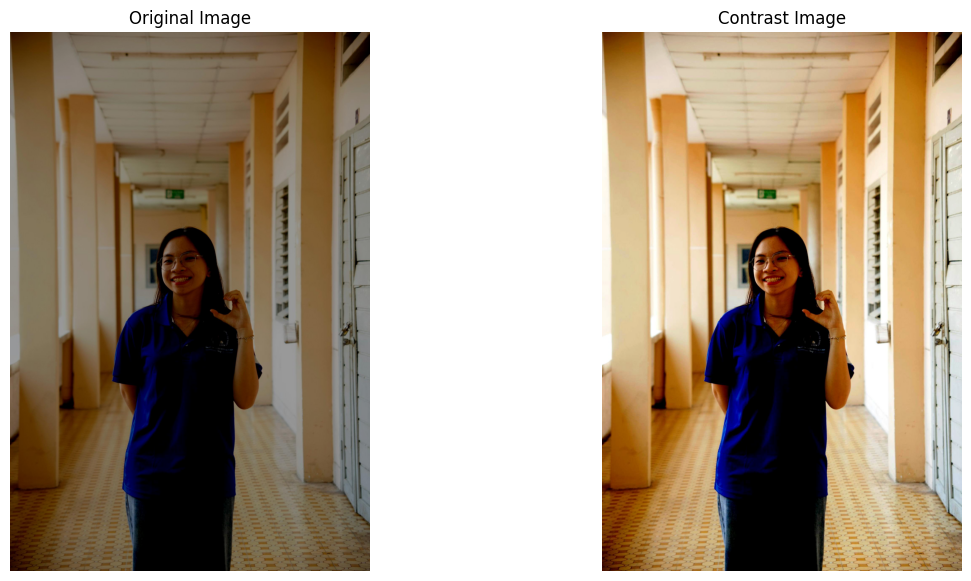

In [36]:
if __name__ == "__main__":
    main()